# Exercises - Explore

1. Spam Data

- Load the spam data set.

In [1]:
#Imports
import re
import unicodedata
import pandas as pd
import nltk
import acquire
import matplotlib.pyplot as plt
import seaborn as sns
import prepare

from wordcloud import WordCloud

from env import get_connection

In [2]:
url = get_connection('spam_db')

In [3]:
query = '''
        SELECT *
        FROM spam
        '''

In [4]:
df = pd.read_sql(query, url, index_col='id')
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [5]:
def clean_text(text, extra_stopwords=['r', 'u', '2', 'ltgt']):
    
    wnl = nltk.stem.WordNetLemmatizer()
    
    stopwords = nltk.corpus.stopwords.words('english') + extra_stopwords
    
    clean_text = (unicodedata.normalize('NFKD', text)
                   .encode('ascii', 'ignore')
                   .decode('utf-8', 'ignore')
                   .lower())
    
    words = re.sub(r'[^\w\s]', '', clean_text).split()
    
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [6]:
ham_words = clean_text(' '.join(df[df['label'] == 'ham']['text']))
spam_words = clean_text(' '.join(df[df['label'] == 'spam']['text']))
all_words = clean_text(' '.join(df['text']))

In [7]:
ham_words

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'oni',
 'dun',
 'say',
 'early',
 'hor',
 'c',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 'im',
 'gonna',
 'home',
 'soon',
 'dont',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'ive',
 'cried',
 'enough',
 'today',
 'ive',
 'searching',
 'right',
 'word',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'time',
 'date',
 'sunday',
 'oh',
 'kim',
 'watching',
 'eh',
 'remember',
 'spell',
 'name',
 'yes',
 'v',
 'naught

In [8]:
ham_counts = pd.Series(ham_words).value_counts()
spam_counts = pd.Series(spam_words).value_counts()
all_counts = pd.Series(all_words).value_counts()

In [9]:
word_freq = pd.concat([ham_counts, spam_counts, all_counts], axis=1)

In [10]:
word_freq.columns = ['ham', 'spam', 'all']
word_freq.fillna(0, inplace=True)

In [11]:
word_freq = word_freq.astype('int')

In [12]:
word_freq['pct_ham'] = word_freq['ham'] / word_freq['all'] * 100
word_freq['pct_spam'] = word_freq['spam'] / word_freq['all'] * 100
word_freq.head()

,ham,spam,all,pct_ham,pct_spam
im,449,13,462,97.186147,2.813853
get,314,83,397,79.093199,20.906801
go,273,31,304,89.802632,10.197368
ok,272,5,277,98.194946,1.805054
dont,257,22,279,92.114695,7.885305


In [13]:
ham_bigrams = pd.Series(nltk.ngrams(ham_words, 2))
ham_bigrams.head()

0          (go, jurong)
1       (jurong, point)
2        (point, crazy)
3    (crazy, available)
4    (available, bugis)
dtype: object

In [14]:
spam_bigrams = pd.Series(nltk.ngrams(spam_words, 2))
spam_bigrams.head()

0    (free, entry)
1    (entry, wkly)
2     (wkly, comp)
3      (comp, win)
4        (win, fa)
dtype: object

In [15]:
top_ham_bigrams = ham_bigrams.value_counts().head(10)
top_ham_bigrams

(call, later)      52
(ill, call)        48
(let, know)        42
(sorry, ill)       39
(dont, know)       32
(good, morning)    31
(new, year)        30
(take, care)       26
(im, going)        24
(ok, lor)          22
dtype: int64

In [16]:
top_spam_bigrams = spam_bigrams.value_counts().head(10)
top_spam_bigrams

(please, call)         44
(customer, service)    27
(po, box)              24
(a1000, cash)          23
(guaranteed, call)     23
(prize, guaranteed)    22
(send, stop)           19
(selected, receive)    19
(await, collection)    19
(every, week)          19
dtype: int64

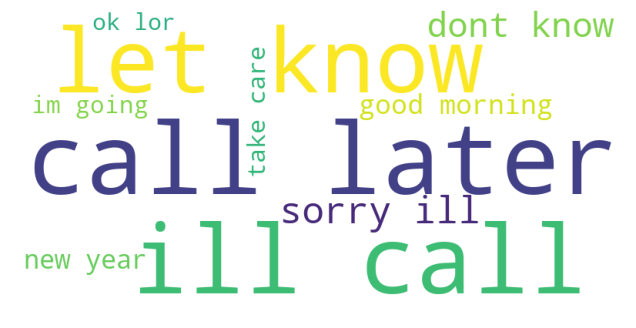

In [17]:
#Word cloud for top ham words
data = {k[0] + ' ' + k[1]: v for k, v in top_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

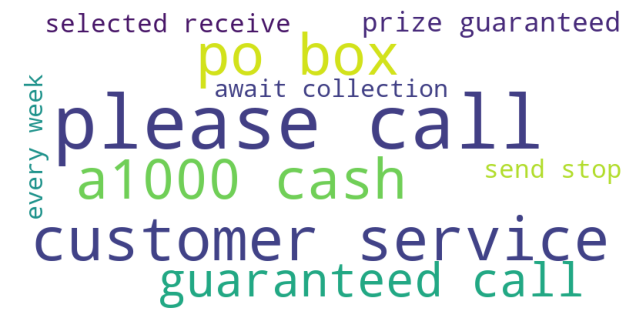

In [18]:
#Word cloud for top spam words
data = {k[0] + ' ' + k[1]: v for k, v in top_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

***Takeaways***

- The word call appears in both the spam and ham top words, but the words are used differently, the ham is more personal about the caller, while the span is requesting to be called back.
- The ham words have greetings and like good morning and the word know, while the spam is using words like guarenteed and cash to persuade someone to call back.

- Is there any overlap in the bigrams for the spam data and the ham data?

- The only word that overlaps is call

- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [19]:
ham_trigrams = pd.Series(nltk.ngrams(ham_words, 3))
ham_trigrams.head()

0          (go, jurong, point)
1       (jurong, point, crazy)
2    (point, crazy, available)
3    (crazy, available, bugis)
4        (available, bugis, n)
dtype: object

In [20]:
spam_trigrams = pd.Series(nltk.ngrams(spam_words, 3))
spam_trigrams.head()

0    (free, entry, wkly)
1    (entry, wkly, comp)
2      (wkly, comp, win)
3        (comp, win, fa)
4         (win, fa, cup)
dtype: object

In [21]:
top_ham_trigrams = ham_trigrams.value_counts().head(10)
top_ham_trigrams

(ill, call, later)      42
(sorry, ill, call)      38
(happy, new, year)      19
(pls, send, message)    13
(cant, pick, phone)     12
(right, pls, send)      12
(phone, right, pls)     12
(pick, phone, right)    12
(hi, hi, hi)            11
(x, x, x)                8
dtype: int64

In [22]:
top_spam_trigrams = spam_trigrams.value_counts().head(10)
top_spam_trigrams

(prize, guaranteed, call)     21
(call, customer, service)     15
(land, line, claim)           14
(reply, call, 08000930705)    14
(private, 2003, account)      13
(2003, account, statement)    13
(camcorder, reply, call)      12
(guaranteed, a1000, cash)     12
(show, 800, unredeemed)       12
(urgent, trying, contact)     11
dtype: int64

***Takeaways***

- The top spam and ham trigrams confirm the takeaways in the bigrams. The spam calls are requesting the receiver to call back and inticing with prizes and guarentees. Alsom an 800 number looks like it is used frequently. While the ham words are more personal in nature and refer to calling back later.

2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [23]:
codeup_df = acquire.get_blog_articles_data()
codeup_df.head()

,title,content
0,Black Excellence in Tech: Panelist Spotlight –...,Black excellence in tech: Panelist Spotlight –...
1,Black excellence in tech: Panelist Spotlight –...,Black excellence in tech: Panelist Spotlight –...
2,Black excellence in tech: Panelist Spotlight –...,Black excellence in tech: Panelist Spotlight –...
3,Black excellence in tech: Panelist Spotlight –...,Black excellence in tech: Panelist Spotlight –...
4,Coding Bootcamp or Self-Learning? Which is Bes...,If you’re interested in embarking on a career ...


In [24]:
def clean_text(text):
    
    wnl = nltk.stem.WordNetLemmatizer()
    
    stopwords = nltk.corpus.stopwords.words('english')
    
    clean_text = (unicodedata.normalize('NFKD', text)
                   .encode('ascii', 'ignore')
                   .decode('utf-8', 'ignore')
                   .lower())
    
    words = re.sub(r'[^\w\s]', '', clean_text).split()
    
    return [wnl.lemmatize(word) for word in words if word not in stopwords ]

In [25]:
codeup_df.content

0    Black excellence in tech: Panelist Spotlight –...
1    Black excellence in tech: Panelist Spotlight –...
2    Black excellence in tech: Panelist Spotlight –...
3    Black excellence in tech: Panelist Spotlight –...
4    If you’re interested in embarking on a career ...
5    Codeup is pleased to announce we have been ran...
Name: content, dtype: object

In [28]:
all_blog_words = clean_text(' '.join(codeup_df['content']))

In [29]:
all_blog_words

['black',
 'excellence',
 'tech',
 'panelist',
 'spotlight',
 'wilmarie',
 'de',
 'la',
 'cruz',
 'mejia',
 'codeup',
 'hosting',
 'black',
 'excellence',
 'tech',
 'panel',
 'honor',
 'black',
 'history',
 'month',
 'february',
 '22',
 '2023',
 'celebrate',
 'wed',
 'like',
 'spotlight',
 'panelist',
 'leading',
 'discussion',
 'learn',
 'bit',
 'respective',
 'experience',
 'black',
 'leader',
 'tech',
 'industry',
 'meet',
 'wilmarie',
 'wilmarie',
 'de',
 'la',
 'cruz',
 'mejia',
 'current',
 'codeup',
 'student',
 'path',
 'becoming',
 'fullstack',
 'web',
 'developer',
 'dallas',
 'tx',
 'campus',
 'wilmarie',
 'veteran',
 'expanding',
 'knowledge',
 'programming',
 'language',
 'technology',
 'journey',
 'codeup',
 'asked',
 'wilmarie',
 'share',
 'experience',
 'codeup',
 'share',
 'able',
 'meet',
 'people',
 'passionate',
 'coding',
 'positive',
 'learning',
 'environment',
 'hope',
 'join',
 'u',
 'february',
 '22nd',
 'sit',
 'insightful',
 'conversation',
 'wilmarie',
 'pa

In [30]:
blog_bigrams = pd.Series(nltk.ngrams(all_blog_words, 2))
blog_bigrams.head()

0      (black, excellence)
1       (excellence, tech)
2         (tech, panelist)
3    (panelist, spotlight)
4    (spotlight, wilmarie)
dtype: object

In [31]:
top_blog_bigrams = blog_bigrams.value_counts().head(10)
top_blog_bigrams

(black, excellence)      9
(coding, bootcamps)      9
(excellence, tech)       9
(course, report)         5
(tech, industry)         5
(tech, panel)            5
(experience, black)      4
(panelist, leading)      4
(leading, discussion)    4
(discussion, learn)      4
dtype: int64

In [32]:
blog_trigrams = pd.Series(nltk.ngrams(all_blog_words, 3))
blog_trigrams.head()

0          (black, excellence, tech)
1       (excellence, tech, panelist)
2        (tech, panelist, spotlight)
3    (panelist, spotlight, wilmarie)
4          (spotlight, wilmarie, de)
dtype: object

In [33]:
top_blog_trigrams = blog_trigrams.value_counts().head(10)
top_blog_trigrams

(black, excellence, tech)          9
(excellence, tech, panel)          5
(2023, celebrate, wed)             4
(wed, like, spotlight)             4
(like, spotlight, panelist)        4
(spotlight, panelist, leading)     4
(panelist, leading, discussion)    4
(leading, discussion, learn)       4
(discussion, learn, bit)           4
(learn, bit, respective)           4
dtype: int64

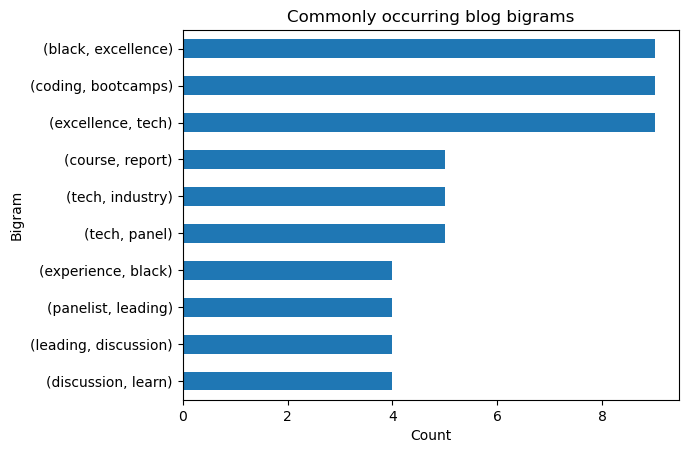

In [34]:
#Plot bigrams
top_blog_bigrams.plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Commonly occurring blog bigrams')
plt.show()

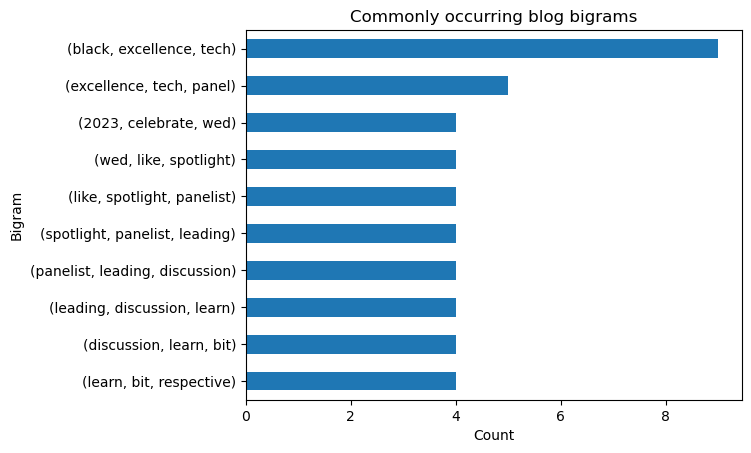

In [35]:
#Plot trigrams
top_blog_trigrams.plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Commonly occurring blog bigrams')
plt.show()

3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [36]:
news_df = acquire.get_news_articles_data()
news_df.head()

,title,content,category
0,BJP's Ashwini Laxman Jagtap set to win Chinchw...,BJP candidate Ashwini Laxman Jagtap is set to ...,national
1,Mohammed Siraj gives energy drink to fan while...,A video went viral showing India pacer Mohamme...,national
2,Historic day for Northeast: Amit Shah on Assem...,After the results were declared for Assembly p...,national
3,110-yr-old Little Mermaid statue in Denmark va...,The 110-year-old Little Mermaid statue in Cope...,national
4,Banks may shut on all Saturdays as IBA agrees ...,Banks may remain shut on all Saturdays in the ...,national


In [37]:
all_news_words = clean_text(' '.join(news_df['content']))

In [38]:
news_bigrams = pd.Series(nltk.ngrams(all_news_words, 2))
news_bigrams.head()

0        (bjp, candidate)
1    (candidate, ashwini)
2       (ashwini, laxman)
3        (laxman, jagtap)
4           (jagtap, set)
dtype: object

In [39]:
top_news_bigrams = news_bigrams.value_counts().head(10)
top_news_bigrams

(actress, renuka)    24
(added, u)           24
(singh, said)        24
(took, place)        24
(way, school)        24
(drink, fan)         24
(renuka, shahane)    24
(highest, level)     24
(official, said)     24
(third, test)        24
dtype: int64

In [40]:
news_trigrams = pd.Series(nltk.ngrams(all_news_words, 3))
news_trigrams.head()

0       (bjp, candidate, ashwini)
1    (candidate, ashwini, laxman)
2       (ashwini, laxman, jagtap)
3           (laxman, jagtap, set)
4              (jagtap, set, win)
dtype: object

In [41]:
top_news_trigrams = news_trigrams.value_counts().head(10)
top_news_trigrams

(actress, renuka, shahane)       24
(bjp, candidate, ashwini)        12
(cueva, del, malalmuerzo)        12
(individual, lived, probably)    12
(lived, probably, warmest)       12
(probably, warmest, region)      12
(warmest, region, europe)        12
(region, europe, peak)           12
(europe, peak, last)             12
(peak, last, ice)                12
dtype: int64

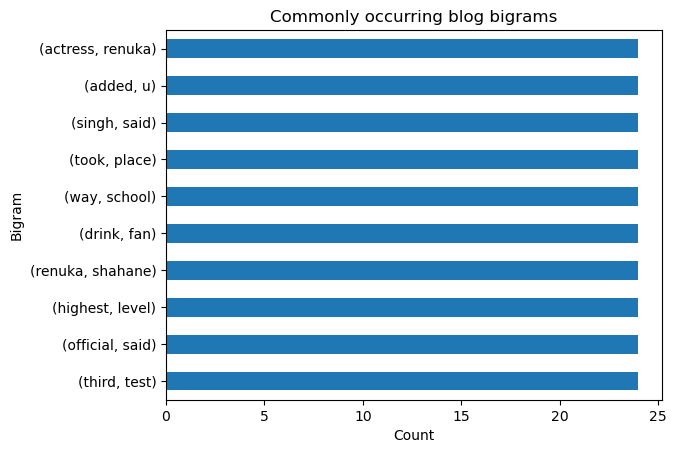

In [42]:
#Plot bigrams
top_news_bigrams.plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Commonly occurring blog bigrams')
plt.show()

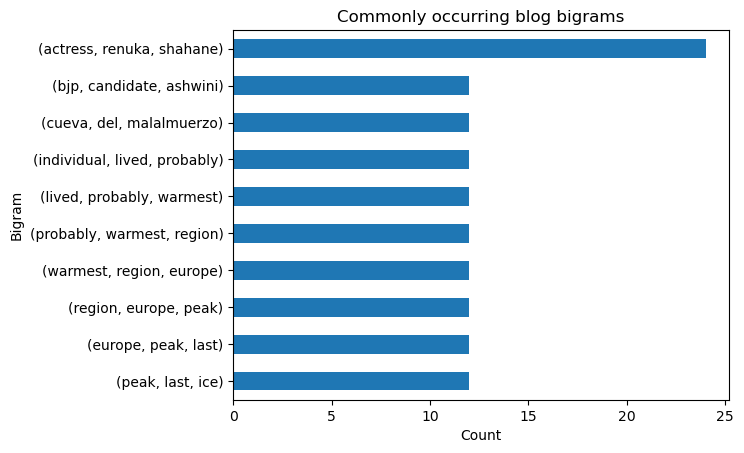

In [43]:
#Plot trigrams
top_news_trigrams.plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Commonly occurring blog bigrams')
plt.show()

In [44]:
all_news_counts = pd.Series(all_news_words).value_counts()

In [45]:
word_news_freq = all_news_counts.astype('int')

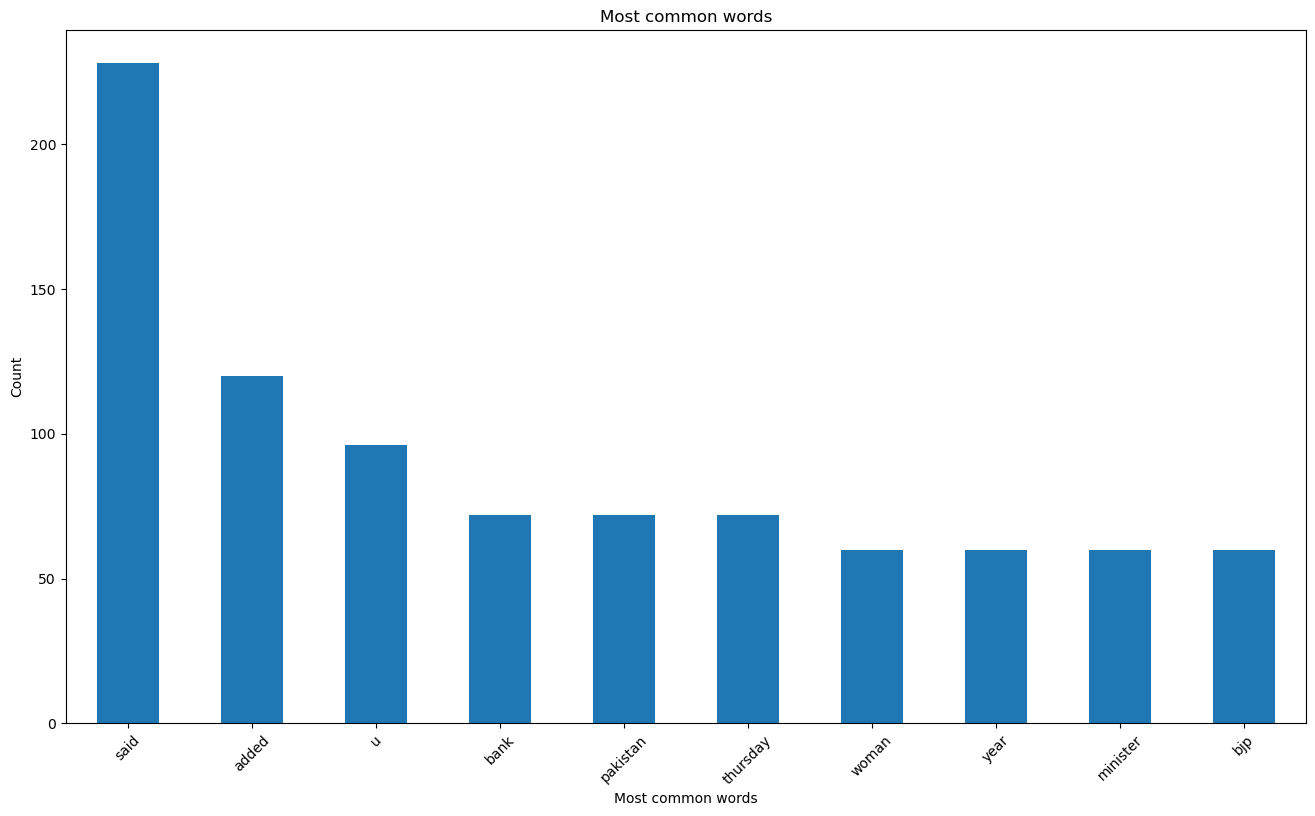

In [46]:
#Plot the most frequent words and color by label
word_news_freq.head(10).plot.bar(figsize=(16, 9))
plt.title('Most common words')
plt.ylabel('Count')
plt.xlabel('Most common words')
plt.xticks(rotation=45)
plt.show()